In [1]:
#Before we code, let's ask a few questions.
#1) What does this dataset describe ?
#Each row is a date with data about the participant, and some data about the other participant (X_o).
#This means every participant is represented multiple times.
#2) What do we want to find ?
#We could try and figure out what makes people decide to date again.
#We could also study the expectations and satisfaction of participants regarding the study.
#We're gonna choose to try to figure out how important interests and grades are regarding the decision to date again.
#But there are thousands of questions that could be asked, and answered (with care for representativity) with this dataset.
#It is simply not possible to answer them all in just a few hours of work.
#Our question now is : WHY would someone want to see YOU again ?
#3) How do we answer our question ?
#We'll try to find correlations between grades, or interests, and decision.
#We'll explore gendered sets to find how both genders interact with different attributes or interests.
#Let's remember : almost ALL of the data we're going to use to answer that question is DECLARATIVE.
#That means it is in no way objective or measurable, 
#since individual feelings regarding grades are EXTREMELY subjective and can vary GREATLY.
#This is something we're going to need to keep in mind.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 200

df = pd.read_csv("sdd.csv", encoding='ISO-8859-1')

#Cleaning a minor mistake in a column
df = df.replace(" Teaching", np.nan)
df["sports"] = pd.to_numeric(df["sports"])

#Gendered sets
f = df.loc[df.gender == 0, :]
m = df.loc[df.gender == 1, :]

df.shape

In [3]:
#Null values
nan = pd.DataFrame(df.isnull().sum(), columns= ['nan_count'])
nan

,nan_count
iid,0
id,1
gender,0
idg,0
condtn,0
wave,0
round,0
position,0
positin1,1846
order,0


In [4]:
#Eliminating rows we won't use or that have too many nans
df1 = df.iloc[:, 11:35]
df2 = df.iloc[:, 39:43]
df3 = df.iloc[:, 45:67]
df4 = df.iloc[:, 97:107]

df = pd.concat([df.iloc[:, 0],df.iloc[:, 2],df1,df2,df3,df4], axis=1)

df.columns

df.isnull().sum()

iid            0
gender         0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
race          63
imprace       79
imprelig      79
from          79
goal          79
date          97
go_out        79
career        89
career_c     138
sports        93
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
dec            0
attr         202
sinc         277
intel        296
fun          350
amb          712
shar        10

In [5]:
#Eliminating rows with nans
df = df.dropna()
print(df.shape)
df.columns

(5421, 62)


Index(['iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o',
       'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'race',
       'imprace', 'imprelig', 'from', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'dec', 'attr',
       'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met'],
      dtype='object')

Text(0.5, 1, 'Correlation between columns')

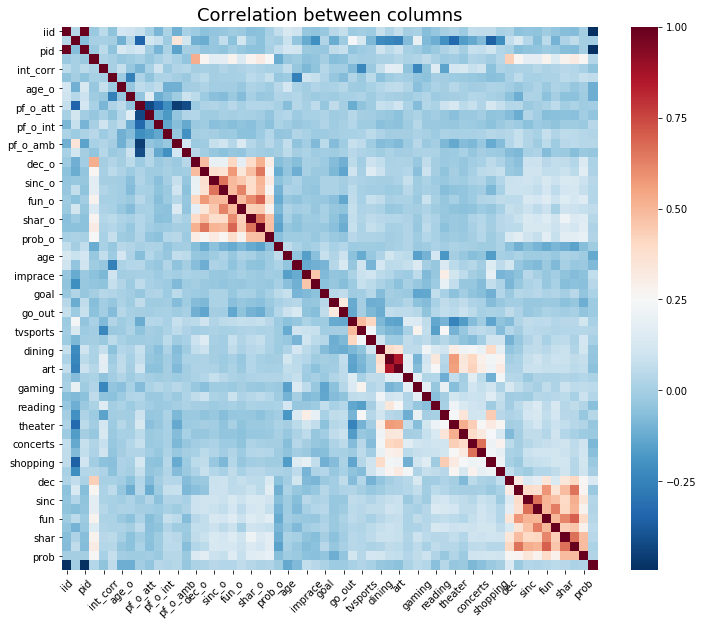

In [6]:
#Quick heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='RdBu_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between columns', fontsize=18)

In [7]:
#Heatmap is not intelligible enough because it is too big
#However, we notice clusters of correlations : ratings given by participant or by other participant tend to be correlated
#There are also correlations between interests
#Let's look at matches
sum(df.match)/len(df.match)

0.1774580335731415

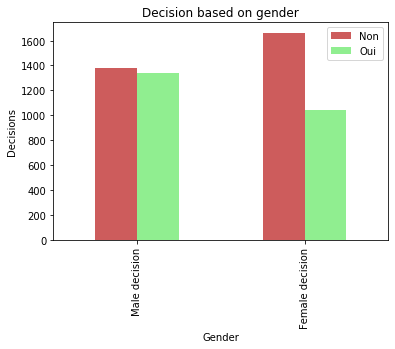

In [67]:
#We can see there is only 17% of matches in our clean dataset
#This means it will be hard to predict matches and find correlations
#Given the values are declarative, and there is no value but prob/prob_o to describe how we expect the other to decide,
#we will rather look at dec/dec_o to evaluate correlations.

#Decision based on gender
legend = ["Non","Oui"]
ax = pd.crosstab(df.gender,df.dec_o).plot(kind='bar', color = ["indianred","lightgreen"])
ax.set_title('Decision based on gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Decisions')
ax.set_xticklabels(['Male decision','Female decision'])
plt.legend(legend, loc="best")

Text(0.5, 1, 'Correlation between grades')

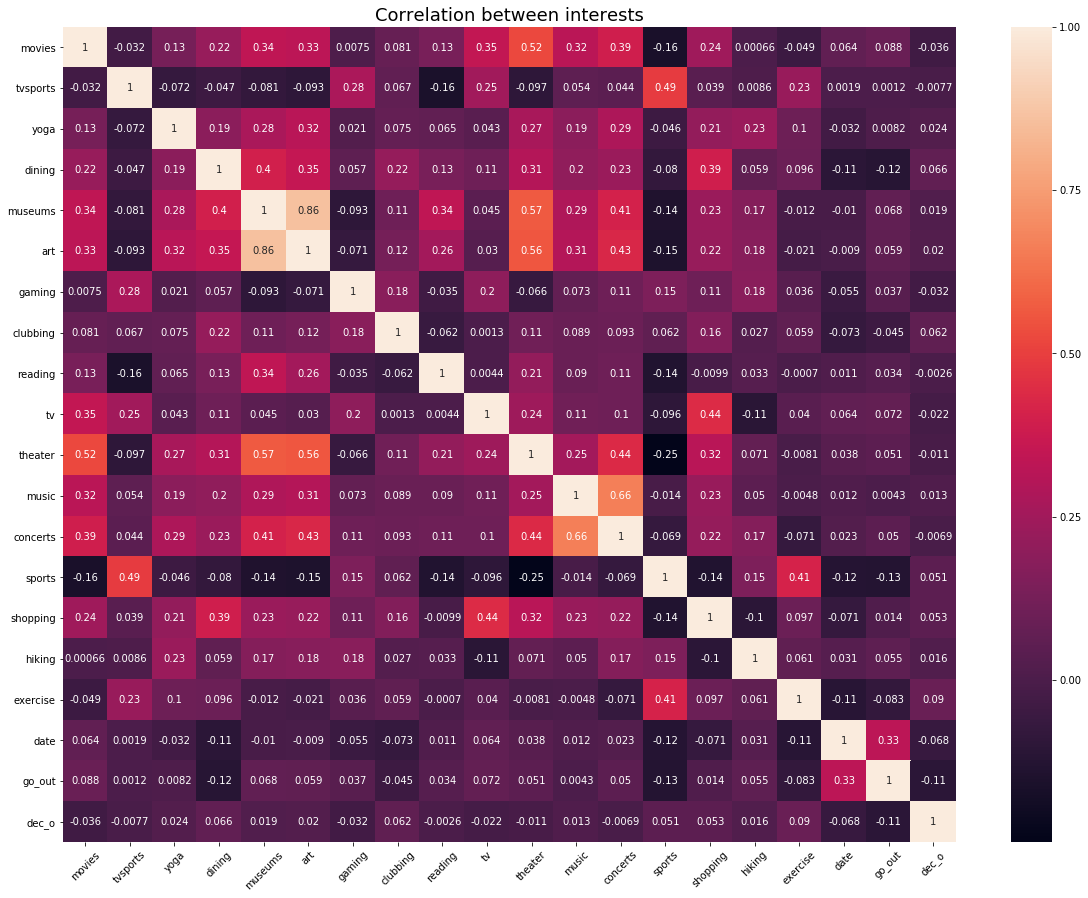

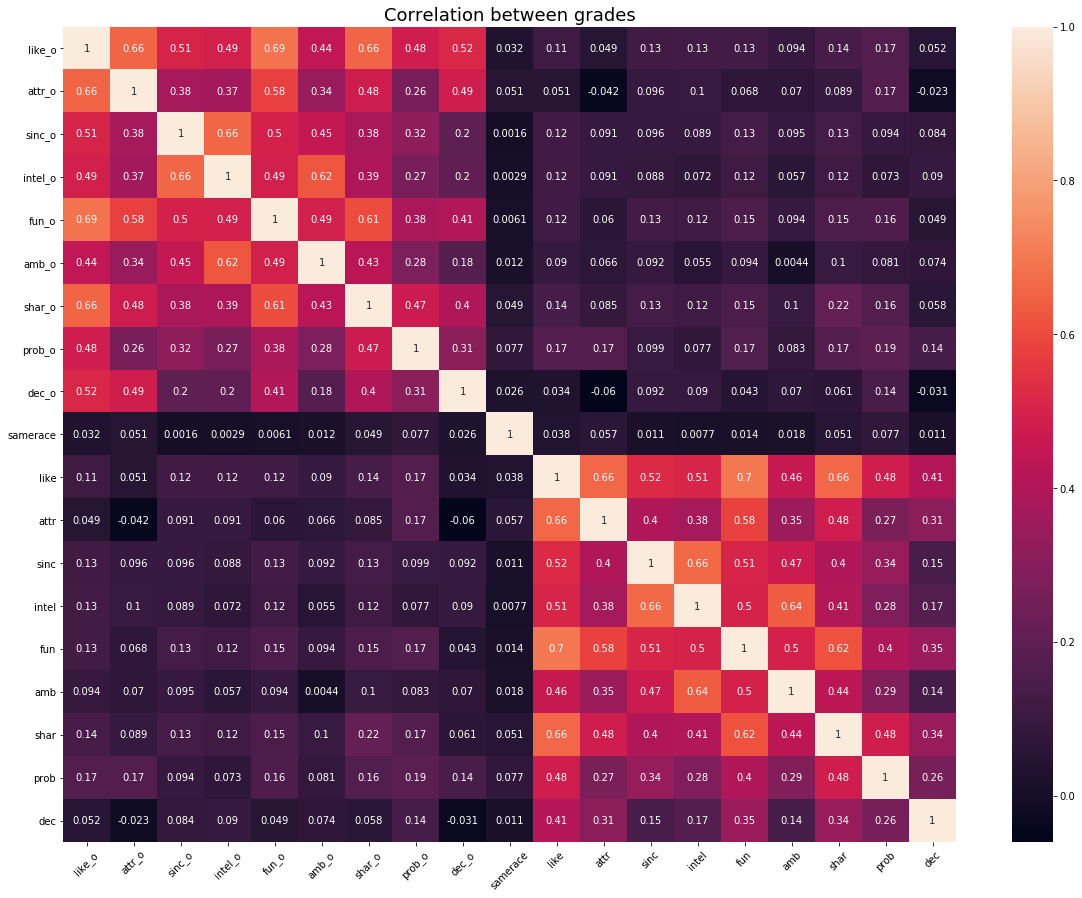

In [9]:
#Okay, so males tend to be less selective than females.

#Let's craft some subsets.
interests = ["movies", "tvsports", "yoga", "dining", "museums", "art", "gaming", "clubbing", 
              "reading", "tv", "theater", "music", "concerts", "sports", 
              "shopping", "hiking", "exercise", "date", "go_out", "dec_o"]

grades = ["like_o", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "prob_o", "dec_o", "samerace",
         "like", "attr", "sinc", "intel", "fun", "amb", "shar", "prob", "dec"]

dfint = df[interests]
dfgrades = df[grades]

#Interests heatmap
corrint = dfint.corr()
plt.figure(figsize=(20,15))
ax = sns.heatmap(corrint,annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between interests', fontsize=18)

#Grades heatmap
corrgr = dfgrades.corr()
plt.figure(figsize=(20,15))
ax = sns.heatmap(corrgr,annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between grades', fontsize=18)

In [10]:
#We invented hot water !
#Jokes aside, the interests heatmap doesn't teach us anything we don't know :
#You tend to go to concerts when you like music, you tend to go to the museum when you like arts...
#And at first, there is no correlation between interests and decision.
#The two clusters of correlations on the second heatmap however do show something (that could be called intuitive) :
#Higher grades tend to be correlated with the decision to ask for a second date...
#But they also tend to be correlated with higher grades !
#Basically, you tend to grade people higher if you liked them, and lower if you didn't like them.
#Attraction is correlated with the fun score, intelligence is correlated with ambition and sincerity...
#Let's have a further look at interests first, to see if matching interests play a role in speed dating.

interests = ["movies", "tvsports", "yoga", "dining", "museums", "art", "gaming", "clubbing", 
              "reading", "tv", "theater", "music", "concerts", "sports", 
              "shopping", "hiking", "exercise", "date", "go_out"]

#Creating dataframe with interest values of both participants in each row
dfself = df.groupby("iid").mean()
dfself = dfself[interests]
dffull = pd.merge(df, dfself, left_on = "pid", right_on = "iid")
print(dffull.columns)

Index(['iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o',
       'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'race',
       'imprace', 'imprelig', 'from', 'goal', 'date_x', 'go_out_x', 'career',
       'career_c', 'sports_x', 'tvsports_x', 'exercise_x', 'dining_x',
       'museums_x', 'art_x', 'hiking_x', 'gaming_x', 'clubbing_x', 'reading_x',
       'tv_x', 'theater_x', 'movies_x', 'concerts_x', 'music_x', 'shopping_x',
       'yoga_x', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like',
       'prob', 'met', 'movies_y', 'tvsports_y', 'yoga_y', 'dining_y',
       'museums_y', 'art_y', 'gaming_y', 'clubbing_y', 'reading_y', 'tv_y',
       'theater_y', 'music_y', 'concerts_y', 'sports_y', 'shopping_y',
       'hiking_y', 'exercise_y', 'date_y', 'go_out_y'],
      dtype='object')


In [11]:
#New columns of interest correlations
#We're not using int_corr because it's a global value and we want to analyze specific interests

interests_y = ["movies_y", "tvsports_y", "yoga_y", "dining_y", "museums_y", "art_y", "gaming_y", "clubbing_y", 
              "reading_y", "tv_y", "theater_y", "music_y", "concerts_y", "sports_y", 
              "shopping_y", "hiking_y", "exercise_y", "date_y", "go_out_y"]

interests = ["movies_x", "tvsports_x", "yoga_x", "dining_x", "museums_x", "art_x", "gaming_x", "clubbing_x", 
              "reading_x", "tv_x", "theater_x", "music_x", "concerts_x", "sports_x", 
              "shopping_x", "hiking_x", "exercise_x", "date_x", "go_out_x"]

newcols = ["moviescorr", "tvsportscorr", "yogacorr", "diningcorr", "museumscorr", "artcorr", "gamingcorr", "clubbingcorr",
          "readingcorr", "tvcorr", "theatercorr", "musiccorr", "concertscorr", "sportscorr", "shoppingcorr", "hikingcorr",
          "exercisecorr", "datecorr", "go_outcorr"]

for i in range (len(dffull)):
    for j in range (len(newcols)):
        dffull[newcols[j]] = (dffull[interests[j]]-dffull[interests_y[j]])

In [12]:
dffull[newcols].head()

,moviescorr,tvsportscorr,yogacorr,diningcorr,museumscorr,artcorr,gamingcorr,clubbingcorr,readingcorr,tvcorr,theatercorr,musiccorr,concertscorr,sportscorr,shoppingcorr,hikingcorr,exercisecorr,datecorr,go_outcorr
0,-1.0,-6.0,7.0,1.0,-1.0,2.0,0.0,3.0,-2.0,5.0,5.0,-1.0,1.0,-7.0,-4.0,2.0,4.0,0.0,-3.0
1,-2.0,-3.0,2.0,1.0,-1.0,3.0,1.0,4.0,-3.0,6.0,2.0,-1.0,-4.0,-1.0,3.0,1.0,5.0,-1.0,-3.0
2,-2.0,1.0,0.0,1.0,1.0,2.0,-3.0,2.0,0.0,0.0,1.0,-4.0,-1.0,2.0,-4.0,4.0,7.0,-2.0,-3.0
3,2.0,-4.0,9.0,4.0,3.0,5.0,-2.0,4.0,-1.0,6.0,6.0,2.0,3.0,-3.0,5.0,-3.0,2.0,0.0,-3.0
4,1.0,-5.0,5.0,4.0,2.0,4.0,-3.0,6.0,-1.0,8.0,5.0,-2.0,-1.0,-6.0,3.0,-2.0,-1.0,0.0,-3.0


In [13]:
#list of columns

columnsint = []
columnsint = newcols
print(columnsint)
columnsint.append("dec_o")
columnsint.append("dec")
columnsint.append("match")

['moviescorr', 'tvsportscorr', 'yogacorr', 'diningcorr', 'museumscorr', 'artcorr', 'gamingcorr', 'clubbingcorr', 'readingcorr', 'tvcorr', 'theatercorr', 'musiccorr', 'concertscorr', 'sportscorr', 'shoppingcorr', 'hikingcorr', 'exercisecorr', 'datecorr', 'go_outcorr']


Text(0.5, 1, 'Correlation of interest correlations')

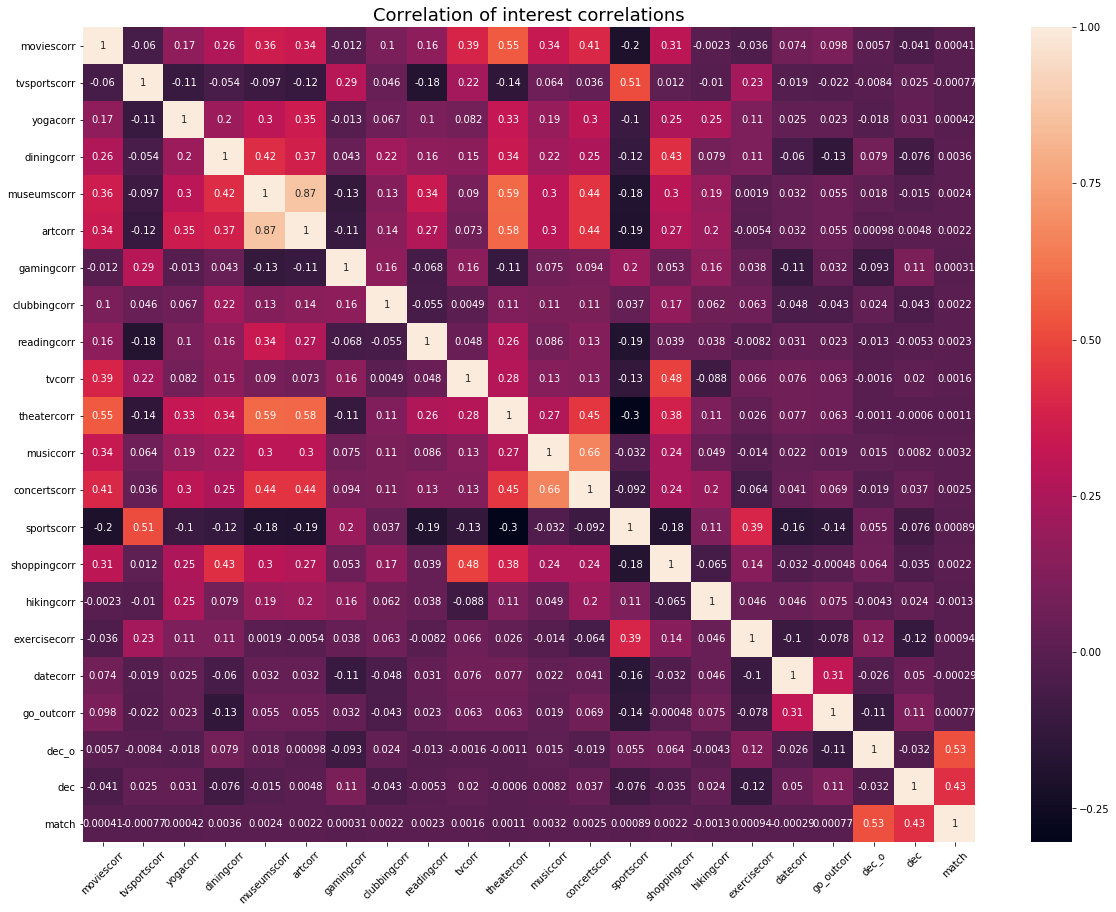

In [14]:
#Interest correlation heatmap

corrgr = dffull[columnsint].corr()
plt.figure(figsize=(20,15))
ax = sns.heatmap(corrgr,annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlations of interest correlations', fontsize=18)

Text(0.5, 1, 'Value of grades when participant is female')

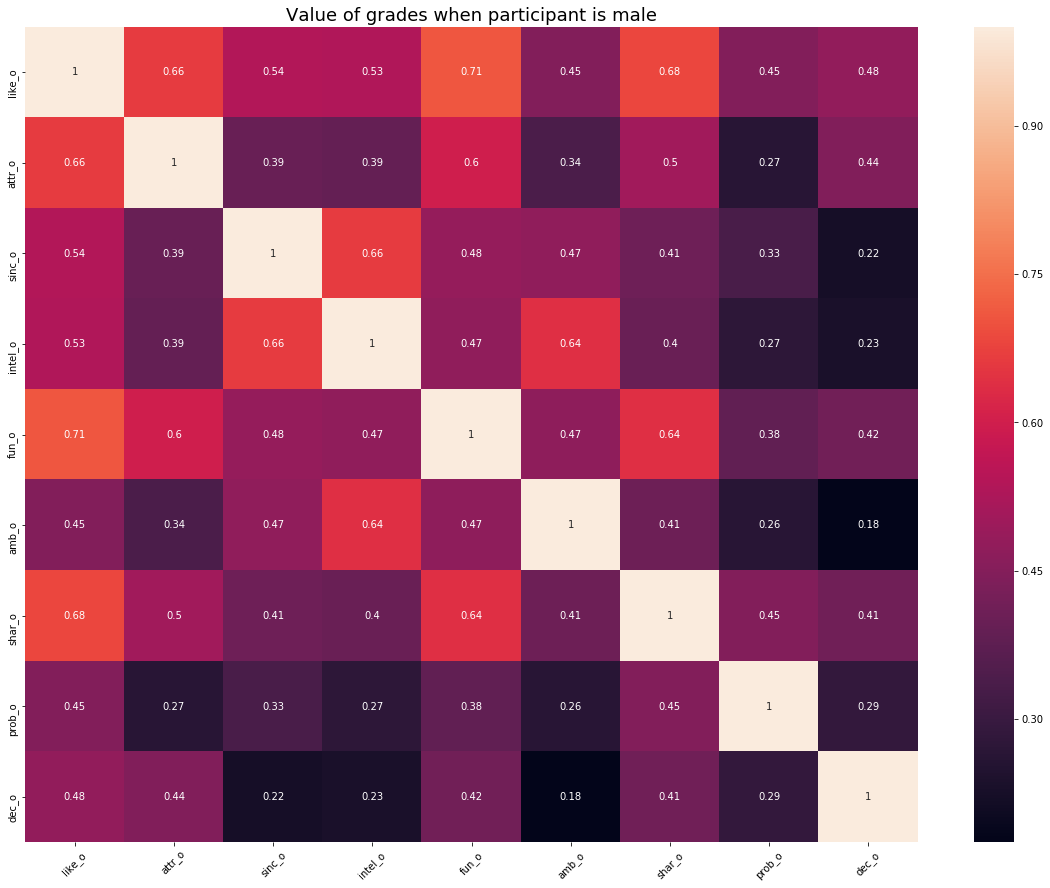

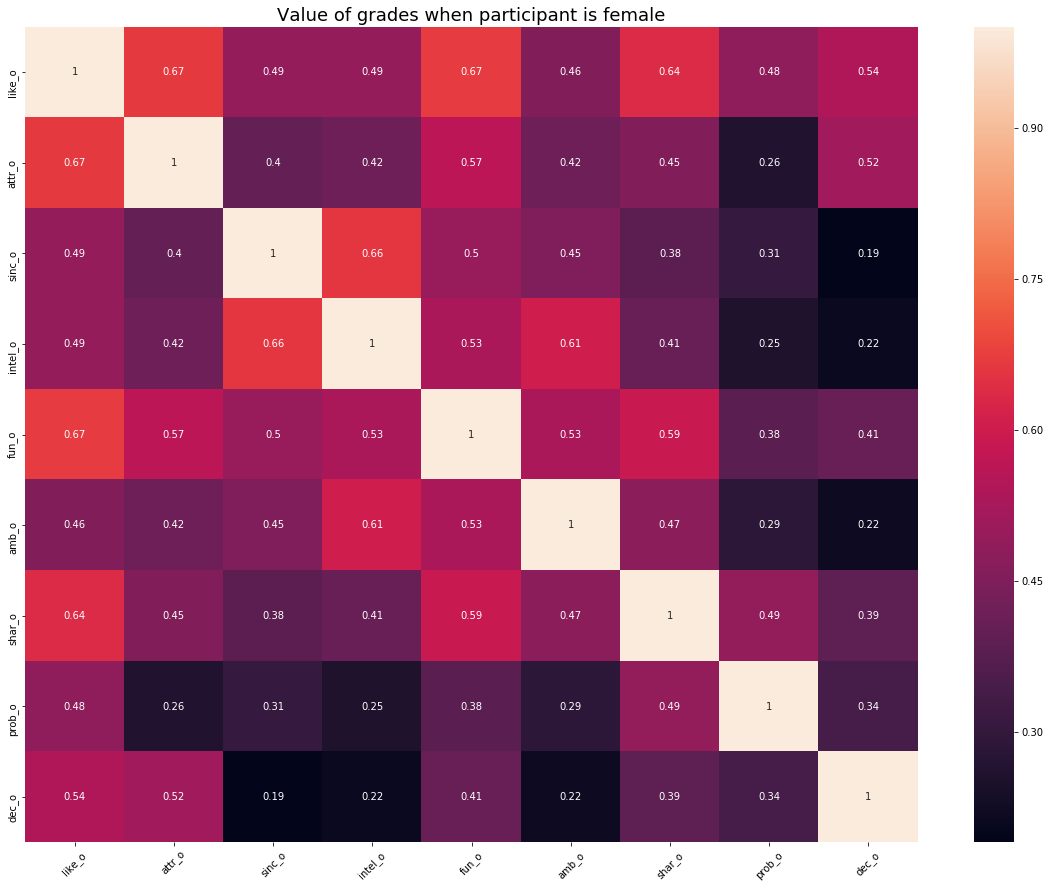

In [20]:
#Okay so basically, having similar interests or hobbies has absolutely no value whatsoever in the context of speed dating
#Let's move on to gendered sets
#First, let's find out the decision value of each attribute by gender

grades = ["like_o", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "prob_o", "dec_o"]

dfgradesm = m[grades]
dfgradesf = f[grades]

#Male grades heatmap
corrgr = dfgradesm.corr()
plt.figure(figsize=(20,15))
ax = sns.heatmap(corrgr,annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Value of grades when participant is male', fontsize=18)

#Female grades heatmap
corrgr = dfgradesf.corr()
plt.figure(figsize=(20,15))
ax = sns.heatmap(corrgr,annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Value of grades when participant is female', fontsize=18)

<Figure size 1440x1080 with 0 Axes>

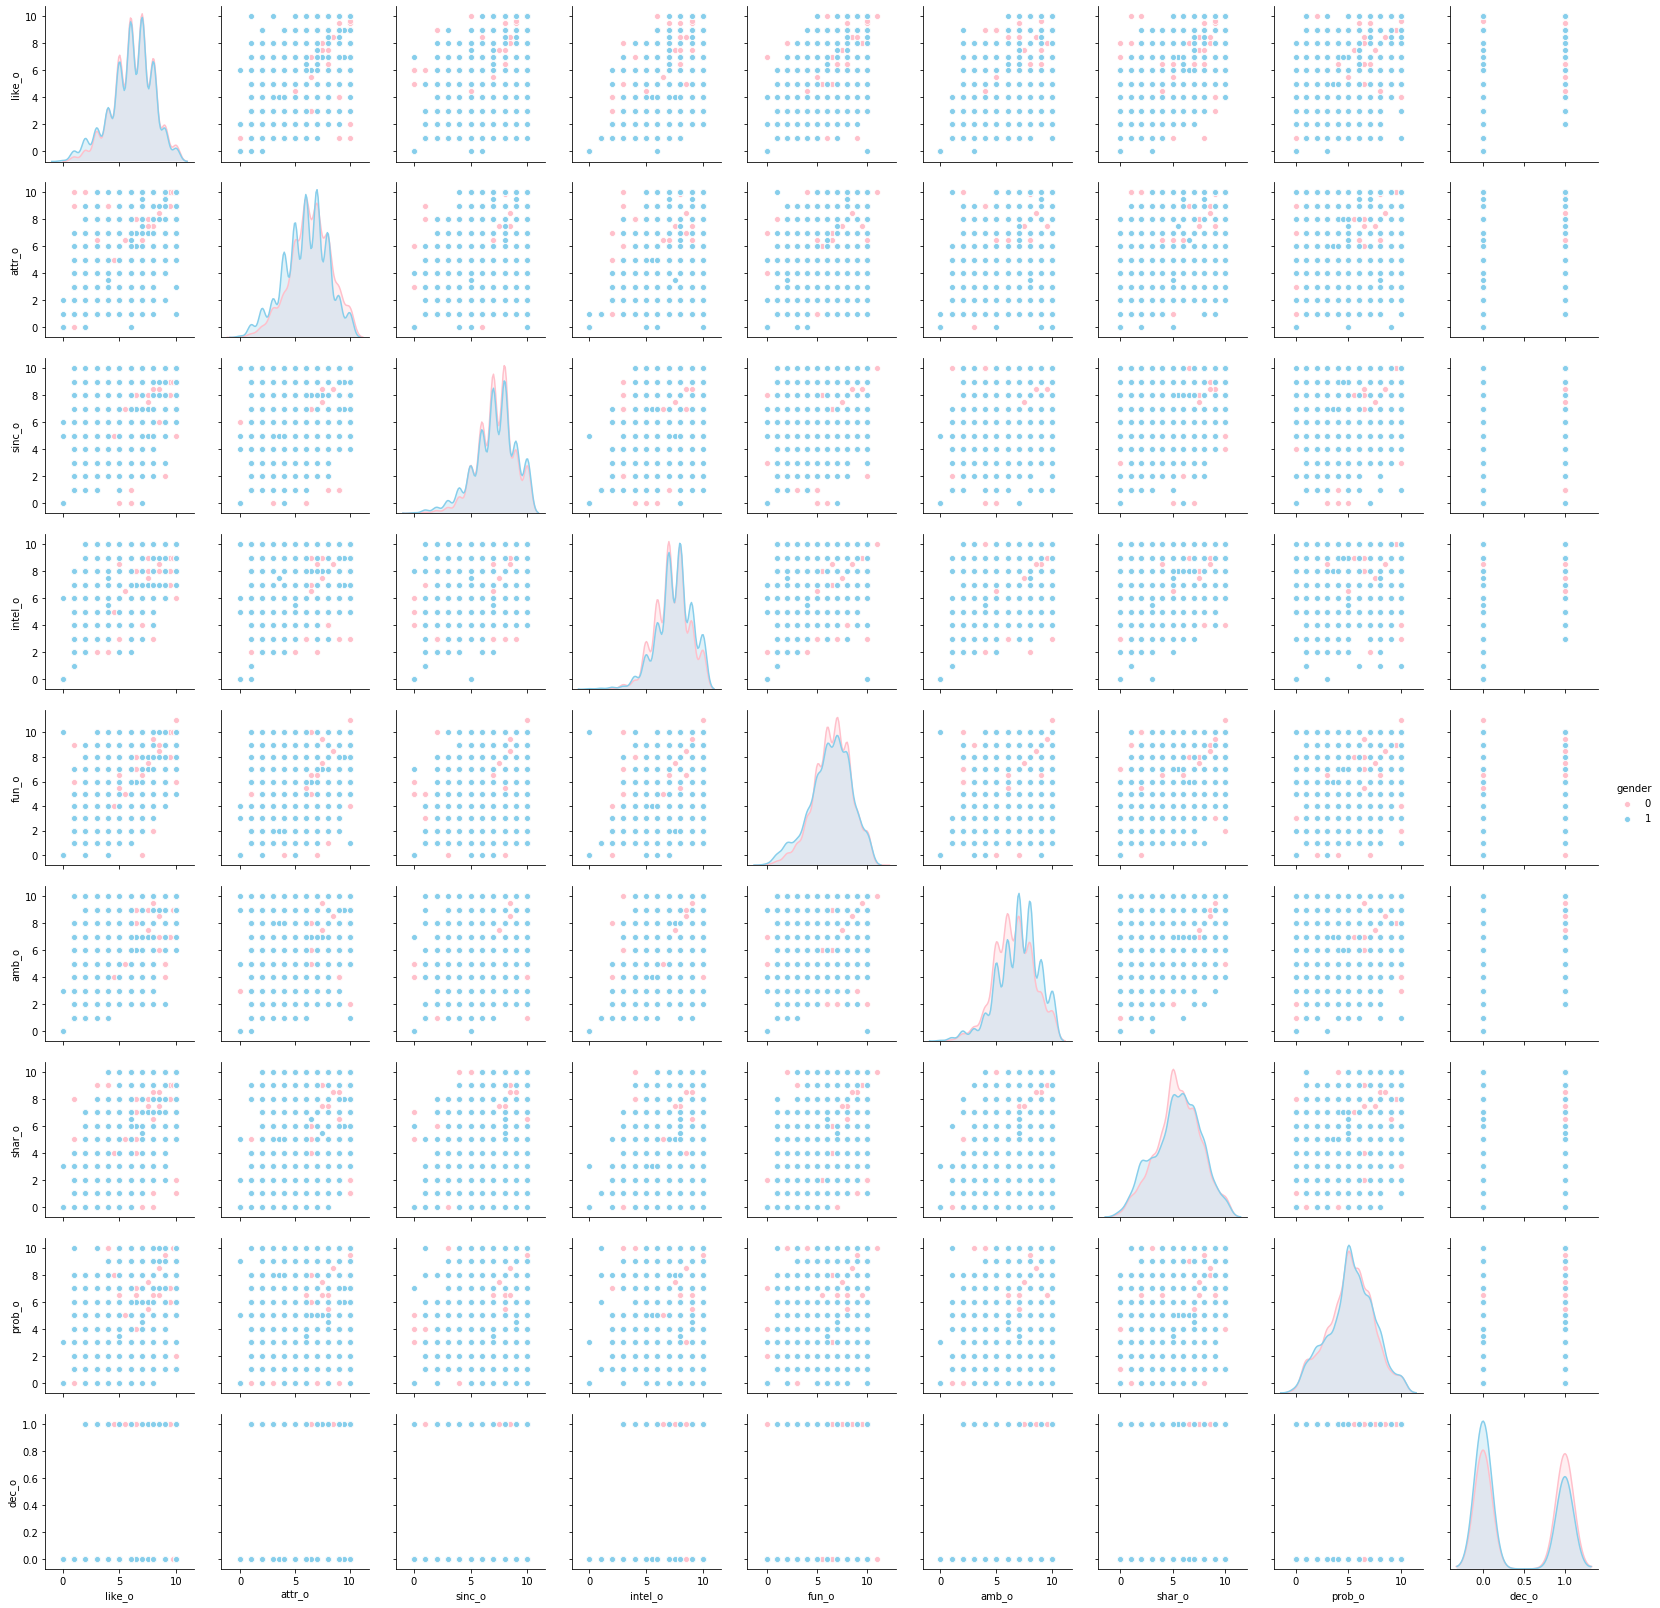

In [19]:
#No attribute seems to be significatively more important to a gender compared to the other.

grades = ["like_o", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "prob_o", "dec_o"]

#Grades pairplot with hue = gender
plt.figure(figsize=(20,15))
ax = sns.pairplot(df, vars = grades, hue = "gender", palette = ["pink","skyblue"])


In [48]:
#Hard to read. Diagonal plots teach us some new things. Mostly, that men tend to get higher ambition grades,
#and that women tend to get higher attraction grades.
#The dec_o row confirms that this is a classification problem ;) and that a logistic regression would fit perfectly.
#To conclude, let's use some statistical tools to evaluate how subjective the grades were.

grades = ["like_o", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "prob_o"]
grades1 = ["like_o", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "prob_o", "gender"]

dfstatm = m.groupby("iid")[grades].agg(np.ptp)
dfstatf = f.groupby("iid")[grades].agg(np.ptp)
dfstat = df.groupby("iid")[grades1].agg(np.ptp)

#We're using ptp to calculate the range of an array. Basically, this is the max grade someone received, minus their min grade
#for that attribute. If on average there is a big difference between max and min grades for one individual,
#it can be infered that grades are extremely subjective. We could have also used the standard deviation for the same problem,
#however it is hardly representative for such small sets (each individual is a new distribution of grades).

print(dfstatm.mean())
print(dfstatf.mean())

like_o     5.803249
attr_o     5.613718
sinc_o     5.577617
intel_o    5.000000
fun_o      5.938628
amb_o      5.675090
shar_o     6.566787
prob_o     6.877256
dtype: float64
like_o     5.574818
attr_o     5.277007
sinc_o     5.204380
intel_o    4.627737
fun_o      5.562044
amb_o      5.359489
shar_o     6.478102
prob_o     6.799270
dtype: float64


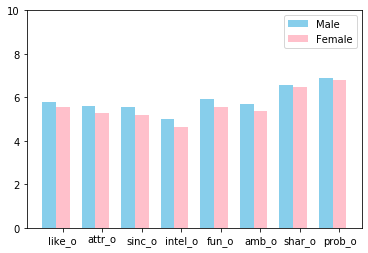

In [63]:
fig, ax = plt.subplots()

barWidth = 0.35

r1 = np.arange(len(dfstatm.mean().values))
r2 = [x + barWidth for x in r1]

plt.bar(r1, dfstatm.mean().values, width=barWidth, color="skyblue", label="Male")
plt.bar(r2, dfstatf.mean().values, width=barWidth, color="pink", label="Female")

plt.xticks([r+barWidth for r in range(len(dfstatm.mean().values))],grades)
plt.ylim(top=10)

plt.legend()

In [ ]:
#Those intervals are huge. To illustrate this, let's figure out what it means :
#If you got an 8 as your max grade for attractiveness, you got a 3 as your minimum.
#From all those visualizations, we can infer a few conclusions :
#1) Interests do NOT matter whatsoever when it comes to speed dating.
#2) Grades given and received vary so much that they do not mean anything other than an individual's global appreciation
#of his or her partner (this is shown by our last plot and the heavy correlations between the different grades).
#3) You should aim to be seen as attractive or fun, but as we just saw, you cannot be funny or attractive to everyone.
#Reflexion leads :
#** We need more data, particularly data that is more representative (here we only have 500-ish individuals).
#** We need more variables, because the ones given did not help us understand anything about love.
#** We need those variables to be as objective as possible.